# Лабораторная работа №3

Геометрическое определение вероятности, задача Бюффона, 
операторы сравнения в MATLAB, задача о встрече.

## 1. Решить и записать в тетрадь решение задачи Бюффона:
На плоскость, разграфленную параллельными прямыми линиями, отстоящими друг от друга на расстояние 2а, наудачу бросается игла длиной 2l. Какова вероятность того, что игла пересечет одну из параллельных прямых, если l<=a?
Указание: элементарный исход каждого опыта — положение иглы после падения. Опишите его парой чисел (x, u): х - расстояние от центра иглы до ближайшей снизу линии (0 < x < 2a); u - угол между иглой и ближайшей снизу линией (0 < u < pi). Опишите пространство всех элементарных исходов опыта, постройте это множество, определите область благоприятную наступления события A — пересечения линии иглой. Примените геометрическое определение вероятности.

## 2. Смоделировать бросание иглы (длиной .5) на плоскость, разграфленную прямыми параллельными линиями (расстояние между линиями 1). 
Выберите N=10,50,100.Нарисуем область исходов благоприятствующих событию A={игла пересечет одну из параллельных линий} ={(uu,xx)|0 < xx < 0.5*sin(uu) или 1-0.5*sin(uu) < xx < 1 }. Для определения частоты наступления события А на необходимо уметь подсчитывать число попаданий случайной точки (u,x) в область А.

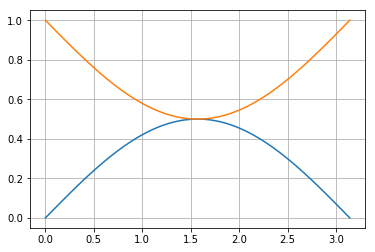

In [9]:
import matplotlib.pyplot as plt
import matplotlib
%matplotlib inline
from math import sin
import numpy as np
from numpy.random import random as rand
x1 = []
x2 = []
u = np.linspace(0,np.pi,num = 100)
for phi in u:
    x1.append(0.5*sin(phi))
    x2.append(1 - 0.5*sin(phi))
x1 = [max(q,0) for q in x1 ]
x2 = [min(q,1) for q in x2 ]
plt.plot(u,x1)
plt.plot(u,x2)
plt.grid()

## 3. Найдите частоту наступления события А в задаче Бюффона для 1000 бросаний иглы.
Выполните серию вычислений, найдите A(i) и усредните их. Сообщите оценку вероятности наступления события А в задаче Бюффона.

In [32]:
a = 0.5
N = 100000
values = [[a*rand(), np.pi * rand() ] for i in range(N)]
A = [(v[0]>=0 and v[0]<=a*sin(v[1])) or (v[0]<1 and v[0]>=1-a*sin(v[1])) for v in values]
p = sum(A)/N
pi = 2/p
print(p)
print('value of pi: '+str(pi))

0.63793
value of pi: 3.1351402191463014


## 4. Решите задачу о встрече 
Двое договорились о встрече в течение часа, время прихода каждого равномерно распределено в течение этого часа, причем первый ждет второго не более 10 минут и уходит, а второй первого - 20 минут. Оценку вероятности наступления события А={встреча состоялась} показать преподавателю.

In [11]:
N = 10000
a = 10
b = 20
answer = 0 
for i in range(N):
    t1 = 60*rand()
    t2 = 60*rand()
    answer = answer + (t2>t1 and t2<t1+a) or (t2<t1 and t1<t2 + b)
answer/N

0.1585